![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_IMDB.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 class IMDB Movie sentiment classifier training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator) from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>


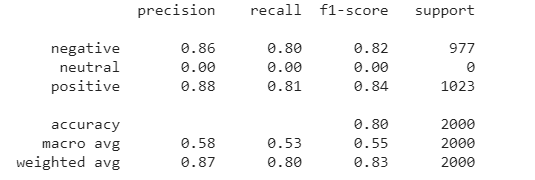



You  can achieve these results or even better on this dataset with test  data:


<br>


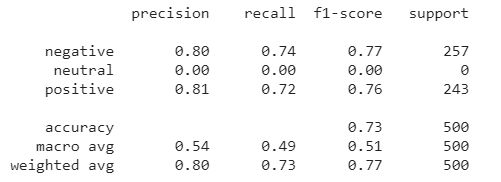


# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 05:38:30--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 05:38:30 (63.2 MB/s) - written to stdout [1671/1671]

     |████████████████████████████████| 204.8MB 67kB/s 
     |████████████████████████████████| 153kB 73.9MB/s 
     |████████████████████████████████| 204kB 23.9MB/s 
     |████████████████████████████████| 204kB 65.5MB/s 


# 2. Download IMDB dataset
https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

IMDB dataset having 50K movie reviews for natural language processing or Text analytics.
This is a dataset for binary sentiment classification containing substantially more data than previous benchmark datasets. We provide a set of 25,000 highly polar movie reviews for training and 25,000 for testing. So, predict the number of positive and negative reviews using either classification or deep learning algorithms.
For more dataset information, please go through the following link,
http://ai.stanford.edu/~amaas/data/sentiment/

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/01/IMDB-Dataset.csv


--2021-05-05 05:40:25--  http://ckl-it.de/wp-content/uploads/2021/01/IMDB-Dataset.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3288450 (3.1M) [text/csv]
Saving to: ‘IMDB-Dataset.csv’

IMDB-Dataset.csv    100%[===================>]   3.14M  20.6MB/s    in 0.2s    

2021-05-05 05:40:25 (20.6 MB/s) - ‘IMDB-Dataset.csv’ saved [3288450/3288450]



In [ ]:
import pandas as pd
train_path = '/content/IMDB-Dataset.csv'

train_df = pd.read_csv(train_path)
# the text data to use for classification should be in a column named 'text'
# the label column must have name 'y' name be of type str
columns=['text','y']
train_df = train_df[columns]
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,text,y
1459,Absolutely wonderful drama and Ros is top notc...,positive
2428,I was totally surprised just how good this mov...,positive
2093,This is a fine musical with a timeless score b...,positive
2370,Saw it yesterday night at the Midnight Slam of...,negative
2064,This show was Fabulous. It was intricate and w...,positive
...,...,...
353,This film held my interest enough to watch it ...,positive
2322,After reading the other tepid reviews and comm...,positive
1997,"This movie, despite its list of B, C, and D li...",negative
1585,One of the most magnificent movies ever made. ...,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report

# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.82      0.88      0.85        26
     neutral       0.00      0.00      0.00         0
    positive       0.85      0.71      0.77        24

    accuracy                           0.80        50
   macro avg       0.56      0.53      0.54        50
weighted avg       0.84      0.80      0.81        50



,sentence_embedding_use,trained_sentiment_confidence,text,document,trained_sentiment,sentence,y,origin_index
0,"[0.06351275742053986, 0.040804557502269745, -2...",0.971989,Absolutely wonderful drama and Ros is top notc...,Absolutely wonderful drama and Ros is top notc...,negative,[Absolutely wonderful drama and Ros is top not...,positive,1459
1,"[0.06992700695991516, 0.0012252129381522536, -...",0.972120,I was totally surprised just how good this mov...,I was totally surprised just how good this mov...,positive,[I was totally surprised just how good this mo...,positive,2428
2,"[0.052442848682403564, -0.017640504986047745, ...",0.989897,This is a fine musical with a timeless score b...,This is a fine musical with a timeless score b...,positive,[This is a fine musical with a timeless score ...,positive,2093
3,"[0.04445473477244377, 0.018118631094694138, -0...",0.999111,Saw it yesterday night at the Midnight Slam of...,Saw it yesterday night at the Midnight Slam of...,negative,[Saw it yesterday night at the Midnight Slam o...,negative,2370
4,"[0.01753336377441883, 0.05620148777961731, -0....",0.954813,This show was Fabulous. It was intricate and w...,This show was Fabulous. It was intricate and w...,positive,"[This show was Fabulous., It was intricate and...",positive,2064
5,"[0.02791544236242771, -0.028735769912600517, -...",0.506074,Jean Dujardin gets Connery's mannerisms down p...,Jean Dujardin gets Connery's mannerisms down p...,neutral,[Jean Dujardin gets Connery's mannerisms down ...,positive,1988
6,"[0.06690913438796997, 0.03236781805753708, -0....",0.982164,This is a tongue in cheek movie from the very ...,This is a tongue in cheek movie from the very ...,positive,[This is a tongue in cheek movie from the very...,positive,1483
7,"[0.05750656872987747, -0.059703629463911057, -...",0.989845,"I have seen most, if not all of the Laurel & H...","I have seen most, if not all of the Laurel & H...",negative,"[I have seen most, if not all of the Laurel & ...",negative,207
8,"[-0.04340153560042381, -0.015529784373939037, ...",0.991958,Although there is melodrama at the center or r...,Although there is melodrama at the center or r...,positive,[Although there is melodrama at the center or ...,positive,2030
9,"[-0.032444775104522705, -0.018744193017482758,...",0.986264,"""Hey Babu Riba"" is a film about a young woman,...","""Hey Babu Riba"" is a film about a young woman,...",positive,"[""Hey Babu Riba"" is a film about a young woman...",positive,397


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict('It was one of the best films i have ever watched in my entire life !!')

,sentence_embedding_use,trained_sentiment_confidence,document,trained_sentiment,sentence,origin_index
0,"[-0.022810865193605423, 0.015739120543003082, ...",0.833494,It was one of the best films i have ever watch...,negative,[It was one of the best films i have ever watc...,0


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe = nlu.load('train.sentiment')
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.92      0.92      0.92        26
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.75      0.86        24

    accuracy                           0.84        50
   macro avg       0.64      0.56      0.59        50
weighted avg       0.96      0.84      0.89        50



,sentence_embedding_use,trained_sentiment_confidence,text,document,trained_sentiment,sentence,y,origin_index
0,"[0.06351275742053986, 0.040804557502269745, -2...",0.564160,Absolutely wonderful drama and Ros is top notc...,Absolutely wonderful drama and Ros is top notc...,neutral,[Absolutely wonderful drama and Ros is top not...,positive,1459
1,"[0.06992700695991516, 0.0012252129381522536, -...",0.853955,I was totally surprised just how good this mov...,I was totally surprised just how good this mov...,positive,[I was totally surprised just how good this mo...,positive,2428
2,"[0.052442848682403564, -0.017640504986047745, ...",0.866541,This is a fine musical with a timeless score b...,This is a fine musical with a timeless score b...,positive,[This is a fine musical with a timeless score ...,positive,2093
3,"[0.04445473477244377, 0.018118631094694138, -0...",0.894689,Saw it yesterday night at the Midnight Slam of...,Saw it yesterday night at the Midnight Slam of...,negative,[Saw it yesterday night at the Midnight Slam o...,negative,2370
4,"[0.01753336377441883, 0.05620148777961731, -0....",0.680551,This show was Fabulous. It was intricate and w...,This show was Fabulous. It was intricate and w...,positive,"[This show was Fabulous., It was intricate and...",positive,2064
5,"[0.02791544236242771, -0.028735769912600517, -...",0.566901,Jean Dujardin gets Connery's mannerisms down p...,Jean Dujardin gets Connery's mannerisms down p...,neutral,[Jean Dujardin gets Connery's mannerisms down ...,positive,1988
6,"[0.06690913438796997, 0.03236781805753708, -0....",0.870670,This is a tongue in cheek movie from the very ...,This is a tongue in cheek movie from the very ...,positive,[This is a tongue in cheek movie from the very...,positive,1483
7,"[0.05750656872987747, -0.059703629463911057, -...",0.811313,"I have seen most, if not all of the Laurel & H...","I have seen most, if not all of the Laurel & H...",negative,"[I have seen most, if not all of the Laurel & ...",negative,207
8,"[-0.04340153560042381, -0.015529784373939037, ...",0.885475,Although there is melodrama at the center or r...,Although there is melodrama at the center or r...,positive,[Although there is melodrama at the center or ...,positive,2030
9,"[-0.032444775104522705, -0.018744193017482758,...",0.880005,"""Hey Babu Riba"" is a film about a young woman,...","""Hey Babu Riba"" is a film about a young woman,...",positive,"[""Hey Babu Riba"" is a film about a young woman...",positive,397


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['trainable_sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['trainable_sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.87      0.77      0.82       988
     neutral       0.00      0.00      0.00         0
    positive       0.85      0.83      0.84      1012

    accuracy                           0.80      2000
   macro avg       0.57      0.53      0.55      2000
weighted avg       0.86      0.80      0.83      2000



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['sentiment']))

              precision    recall  f1-score   support

    negative       0.85      0.75      0.80       246
     neutral       0.00      0.00      0.00         0
    positive       0.84      0.81      0.83       254

    accuracy                           0.78       500
   macro avg       0.56      0.52      0.54       500
weighted avg       0.85      0.78      0.81       500



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('It was one of the best films i have ever watched in my entire life !!')
preds

,sentiment_confidence,sentence_embedding_from_disk,text,document,sentence,origin_index,sentiment
0,"[0.9986149, 0.9986149]","[[0.030373765155673027, 0.05577867478132248, 0...",It was one of the best films i have ever watch...,It was one of the best films i have ever watch...,[It was one of the best films i have ever watc...,8589934592,"[positive, positive]"


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno